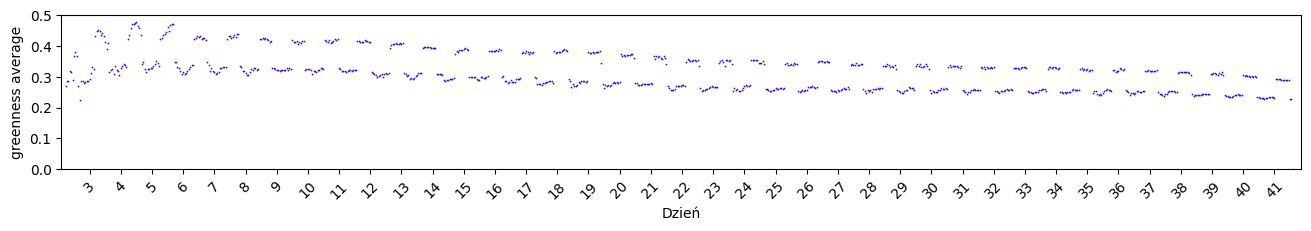

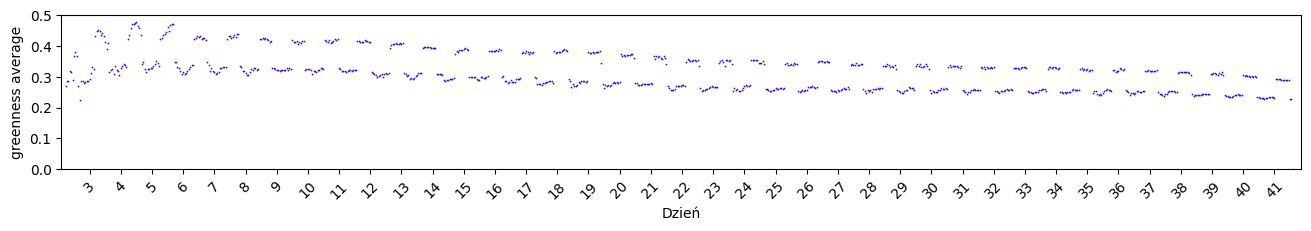

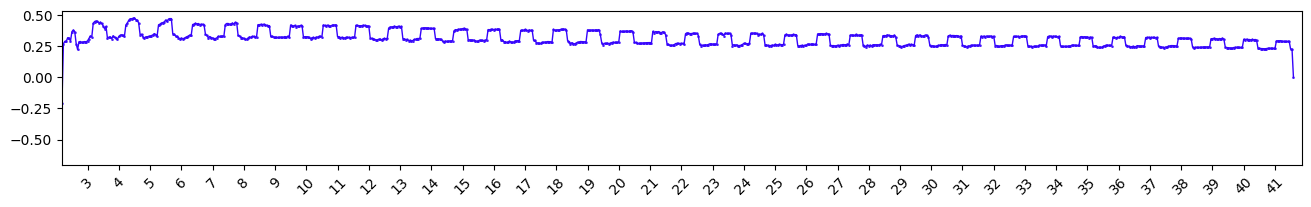

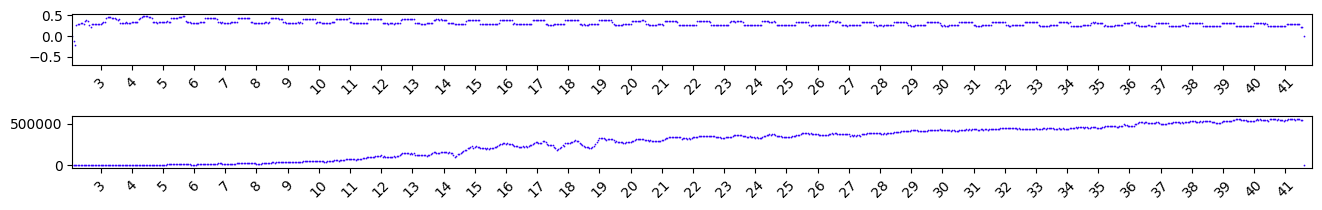

Stosowane nawożenie: 'NPK1':
         kod   unit    genotype g_alias treatment            timestamp  Day  \
6688  NPK1_5  1:2:2  rzodkiewka     uyh      NPK1  2023-10-31 00:43:48   20   
6689  NPK1_5  1:2:2  rzodkiewka     uyh      NPK1  2023-10-31 01:46:06   20   
6690  NPK1_5  1:2:2  rzodkiewka     uyh      NPK1  2023-10-31 02:48:23   20   
6691  NPK1_5  1:2:2  rzodkiewka     uyh      NPK1  2023-10-31 03:50:41   20   
6692  NPK1_5  1:2:2  rzodkiewka     uyh      NPK1  2023-10-31 04:52:58   20   

          Time  Digital biomass [mm³]  greenness average  ...  NPCI bin3  \
6688  00:43:48               209933.0            0.37436  ...    0.99418   
6689  01:46:06               209325.0            0.37326  ...    0.99365   
6690  02:48:23               215061.0            0.37424  ...    0.99405   
6691  03:50:41               218537.0            0.37868  ...    0.99531   
6692  04:52:58               220784.0            0.37850  ...    0.99564   

      NPCI bin4  NPCI bin5  PSRI averag

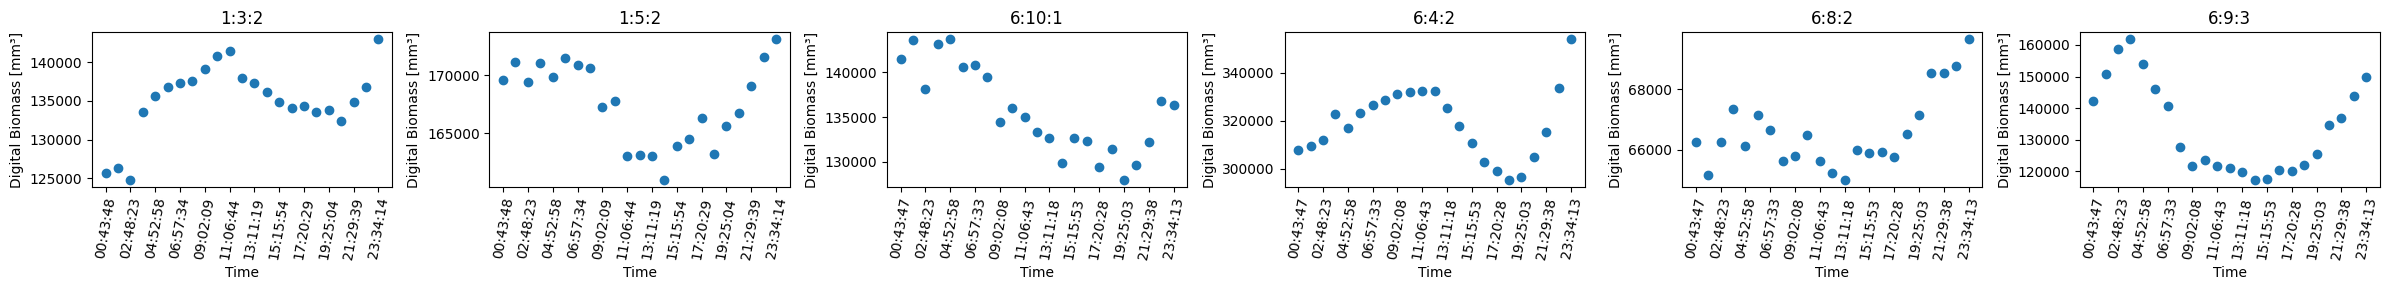

'NPK1_5':
         kod   unit treatment  Day      Time  Digital biomass [mm³]  \
6688  NPK1_5  1:2:2      NPK1   20  00:43:48               209933.0   
6689  NPK1_5  1:2:2      NPK1   20  01:46:06               209325.0   
6690  NPK1_5  1:2:2      NPK1   20  02:48:23               215061.0   
6691  NPK1_5  1:2:2      NPK1   20  03:50:41               218537.0   
6692  NPK1_5  1:2:2      NPK1   20  04:52:58               220784.0   

      greenness average  Height [mm]  Leaf angle [°]  Leaf area [mm²]  \
6688            0.37436       47.301          53.736          4438.26   
6689            0.37326       47.645          53.558          4393.43   
6690            0.37424       48.223          52.821          4459.74   
6691            0.37868       48.947          53.015          4464.78   
6692            0.37850       49.115          52.599          4495.24   

      Leaf area (projected) [mm²]  NDVI average  NPCI average  PSRI average  
6688                      3577.57       0.5950

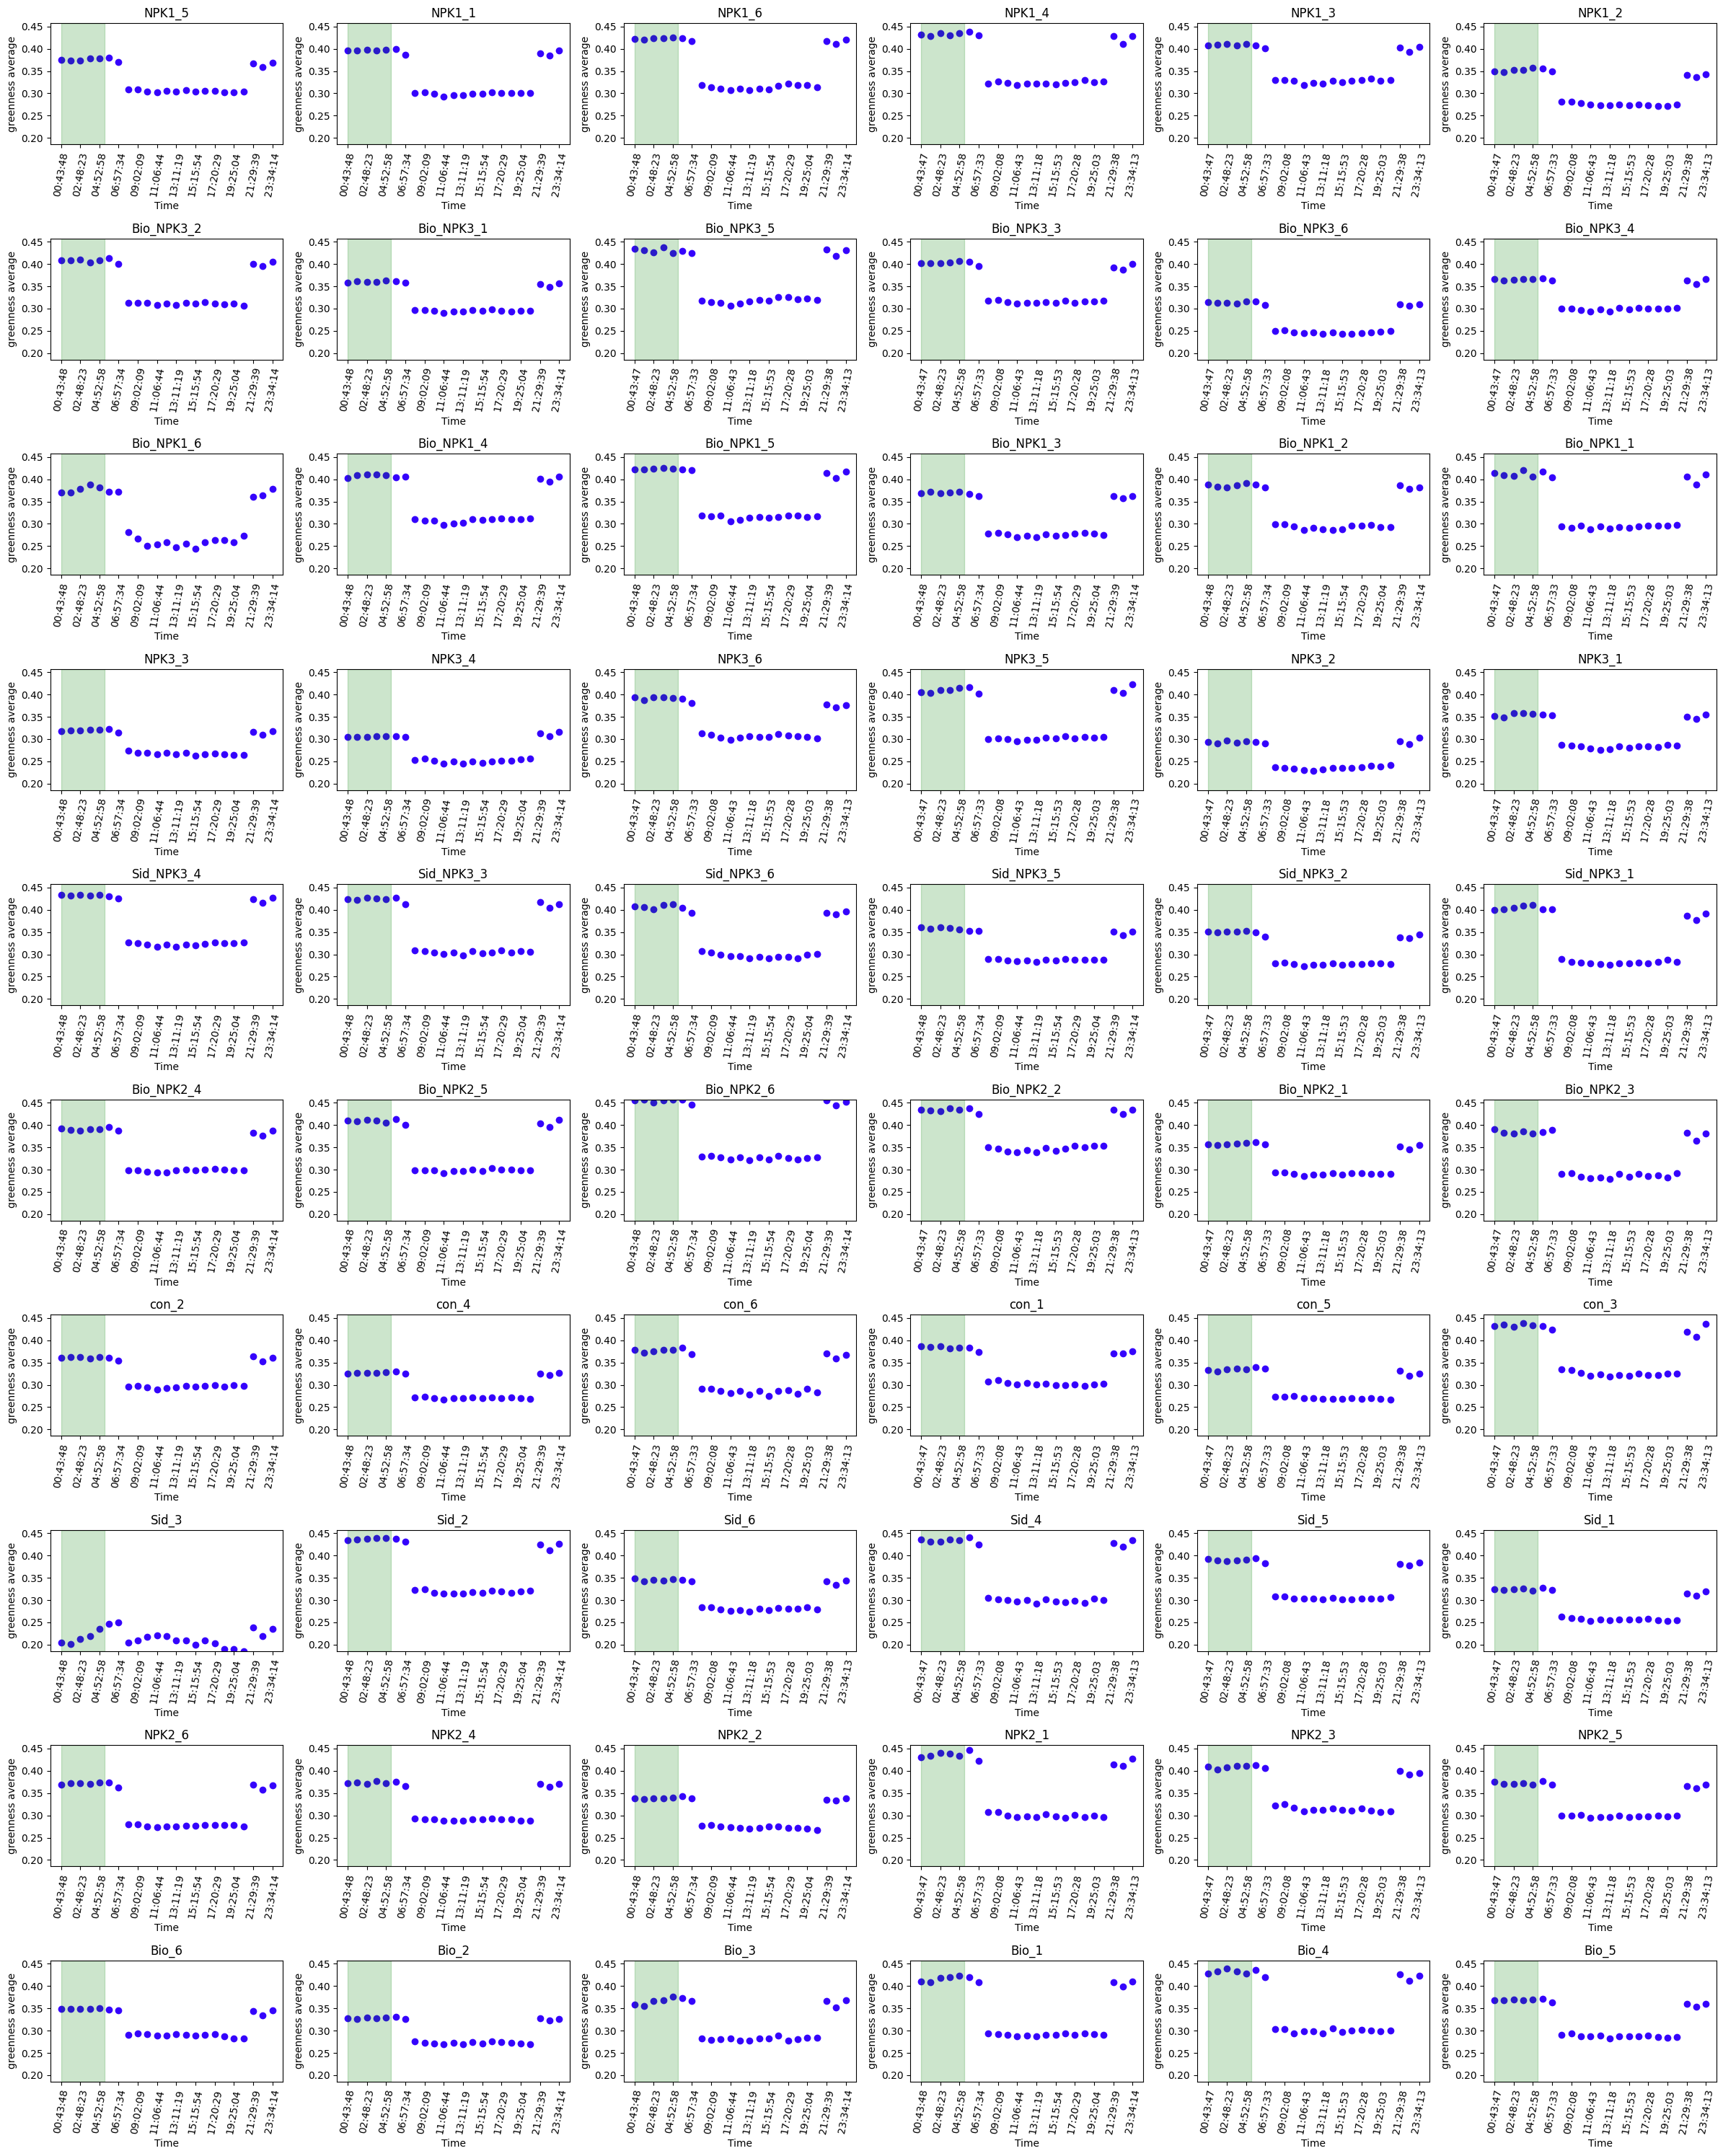

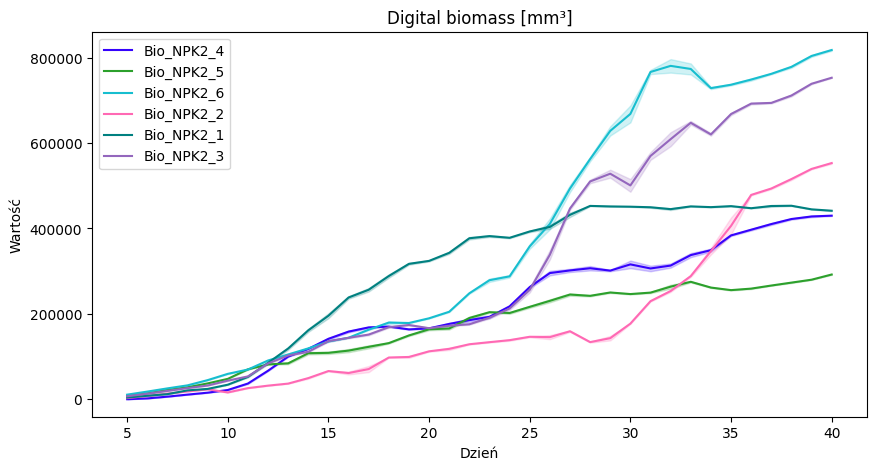

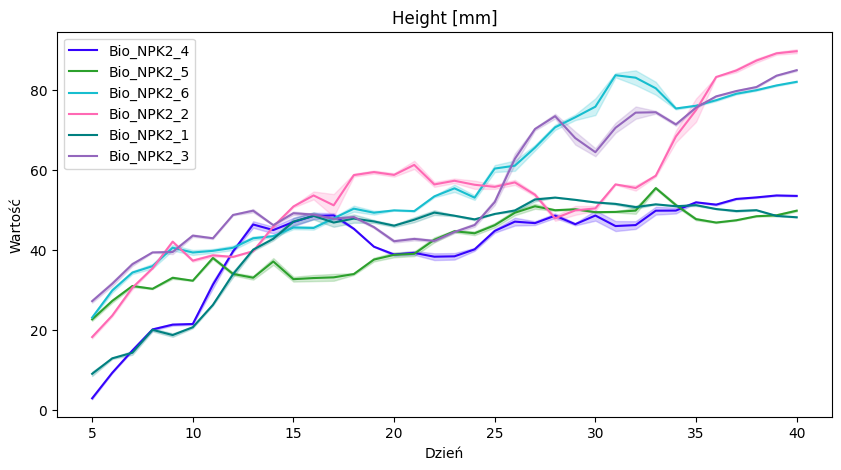

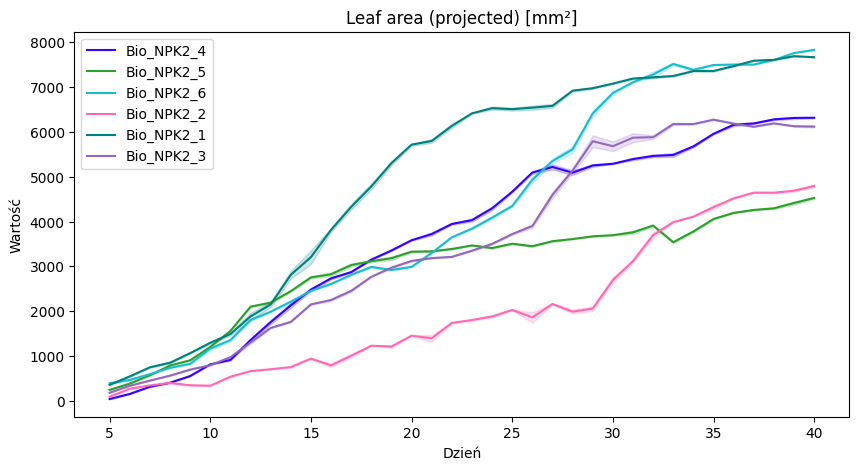

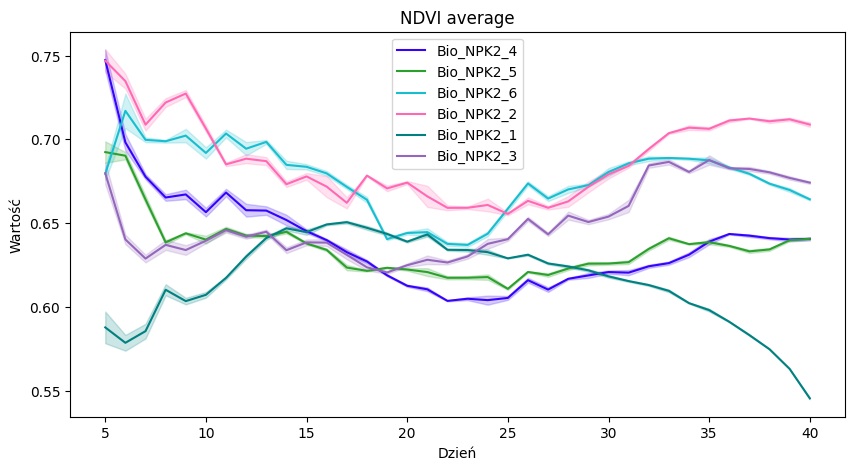

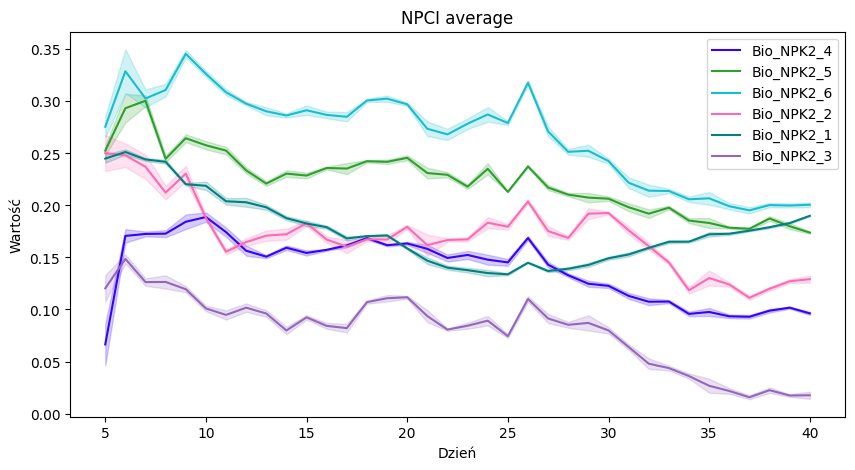

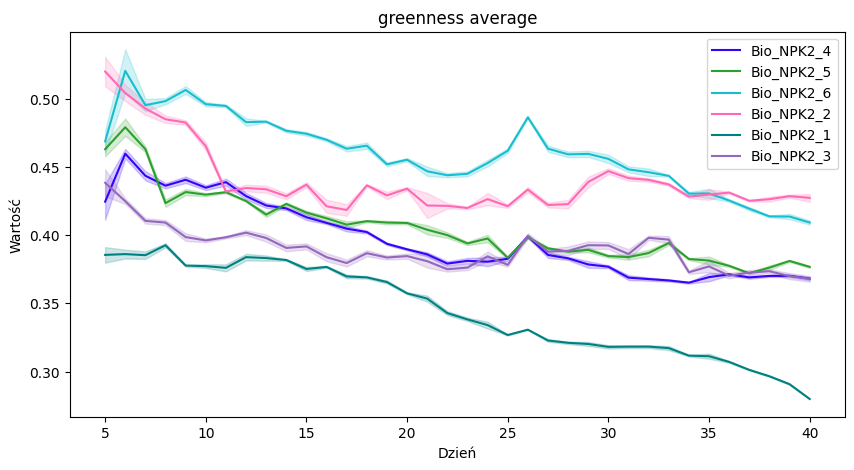

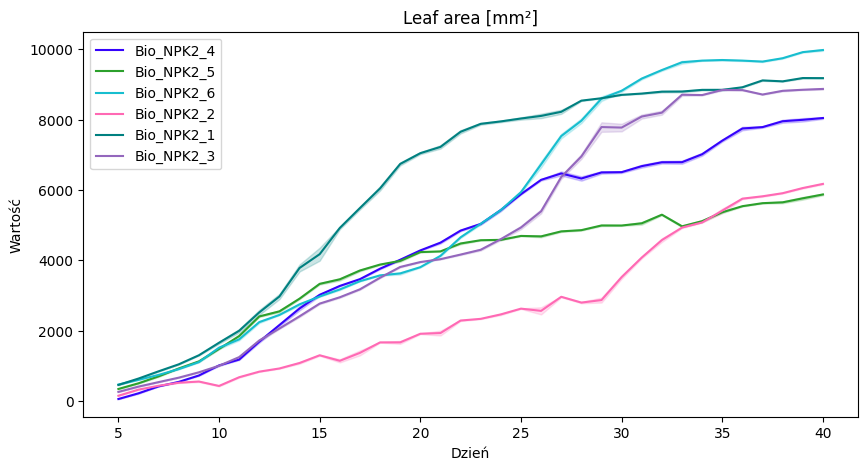

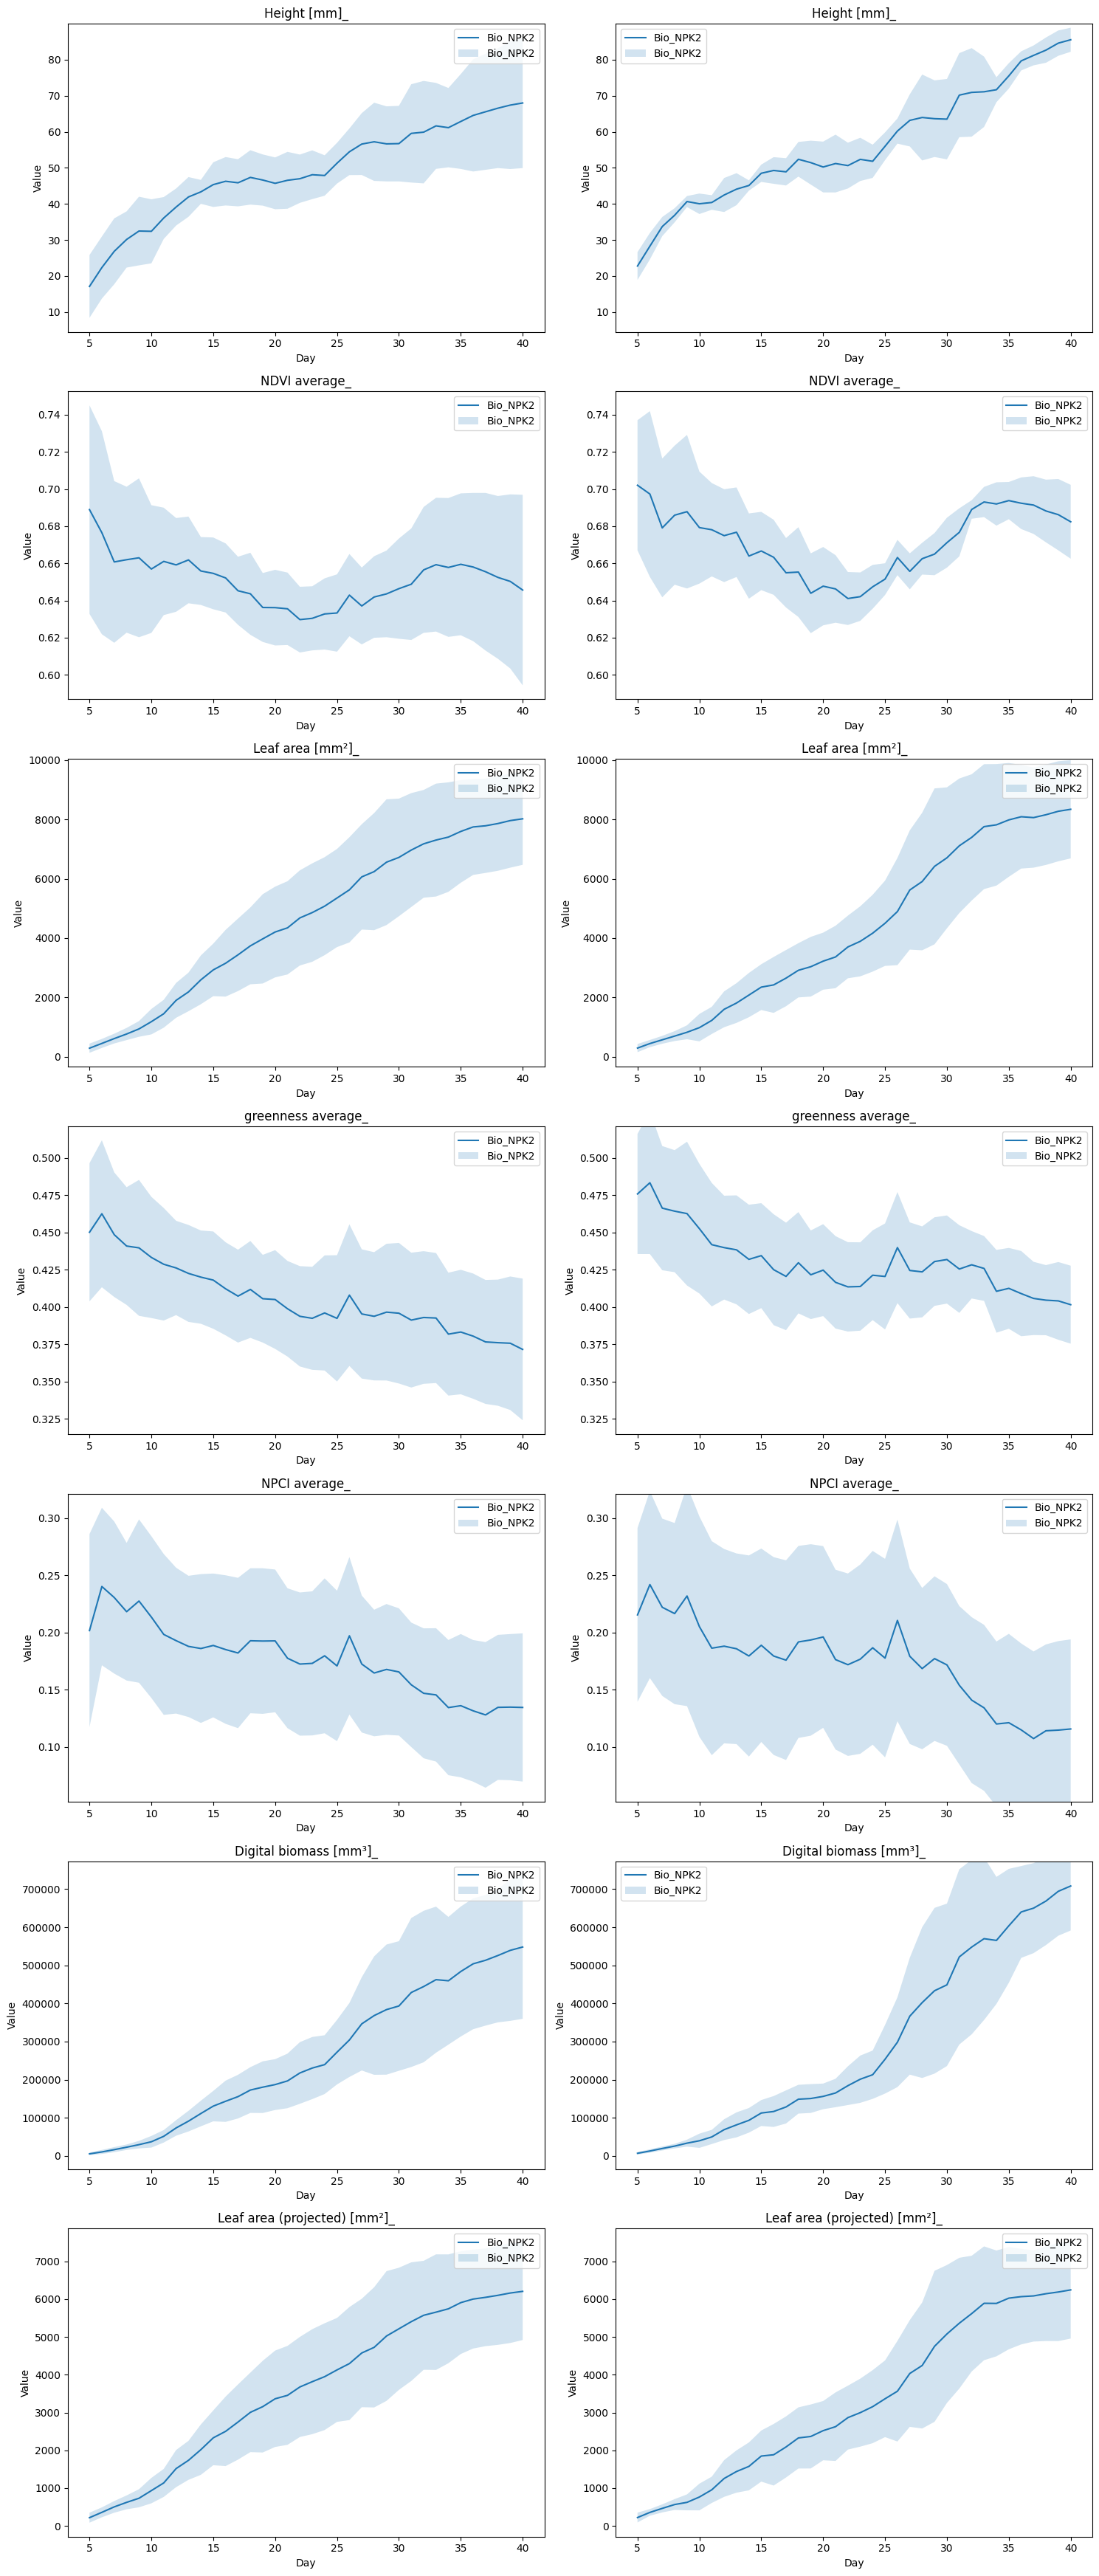

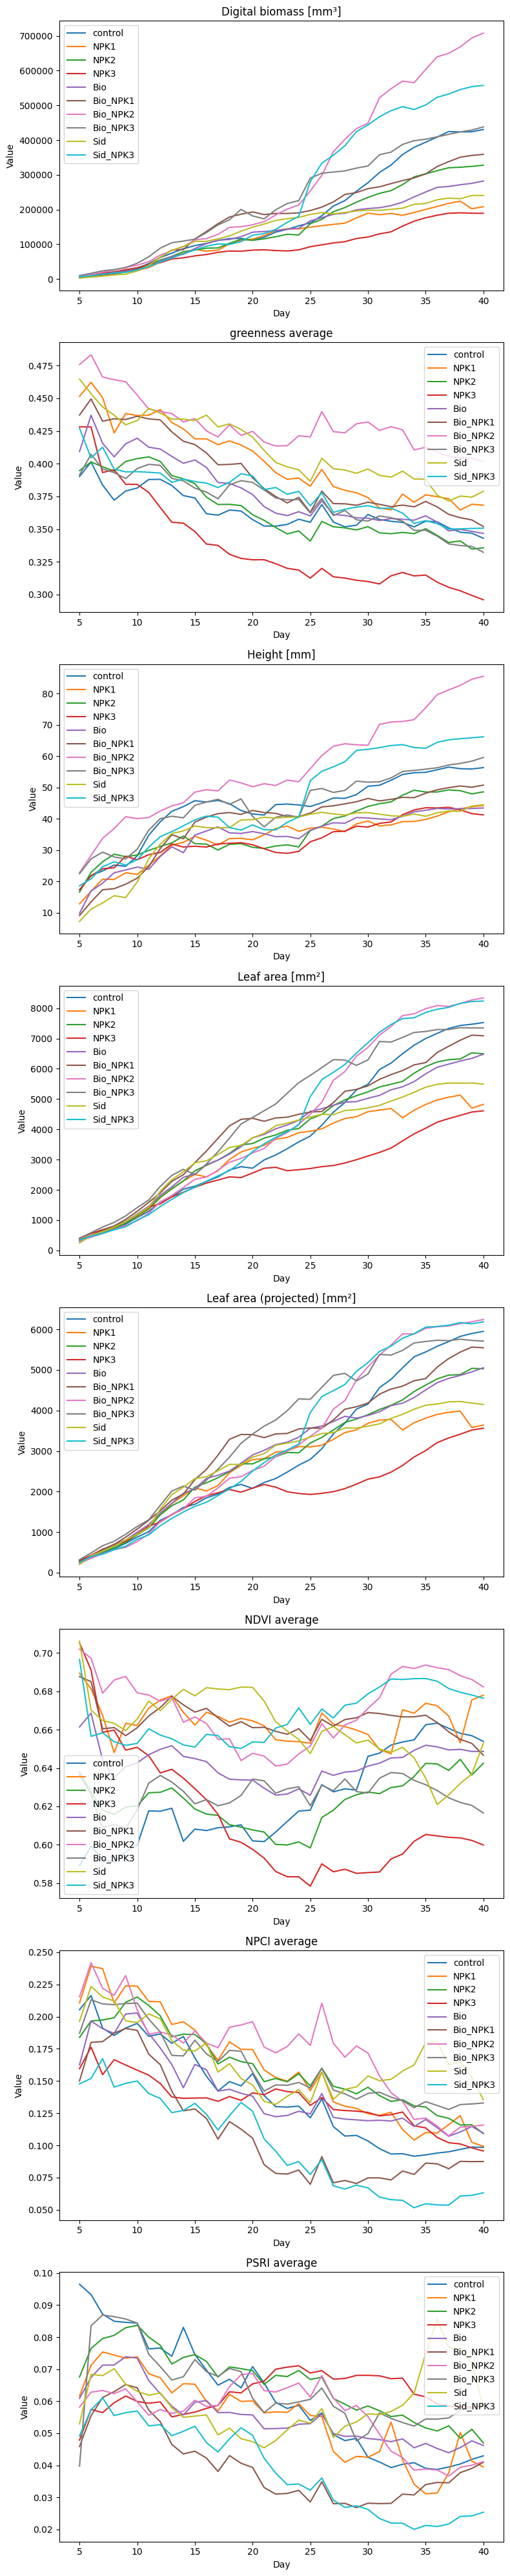

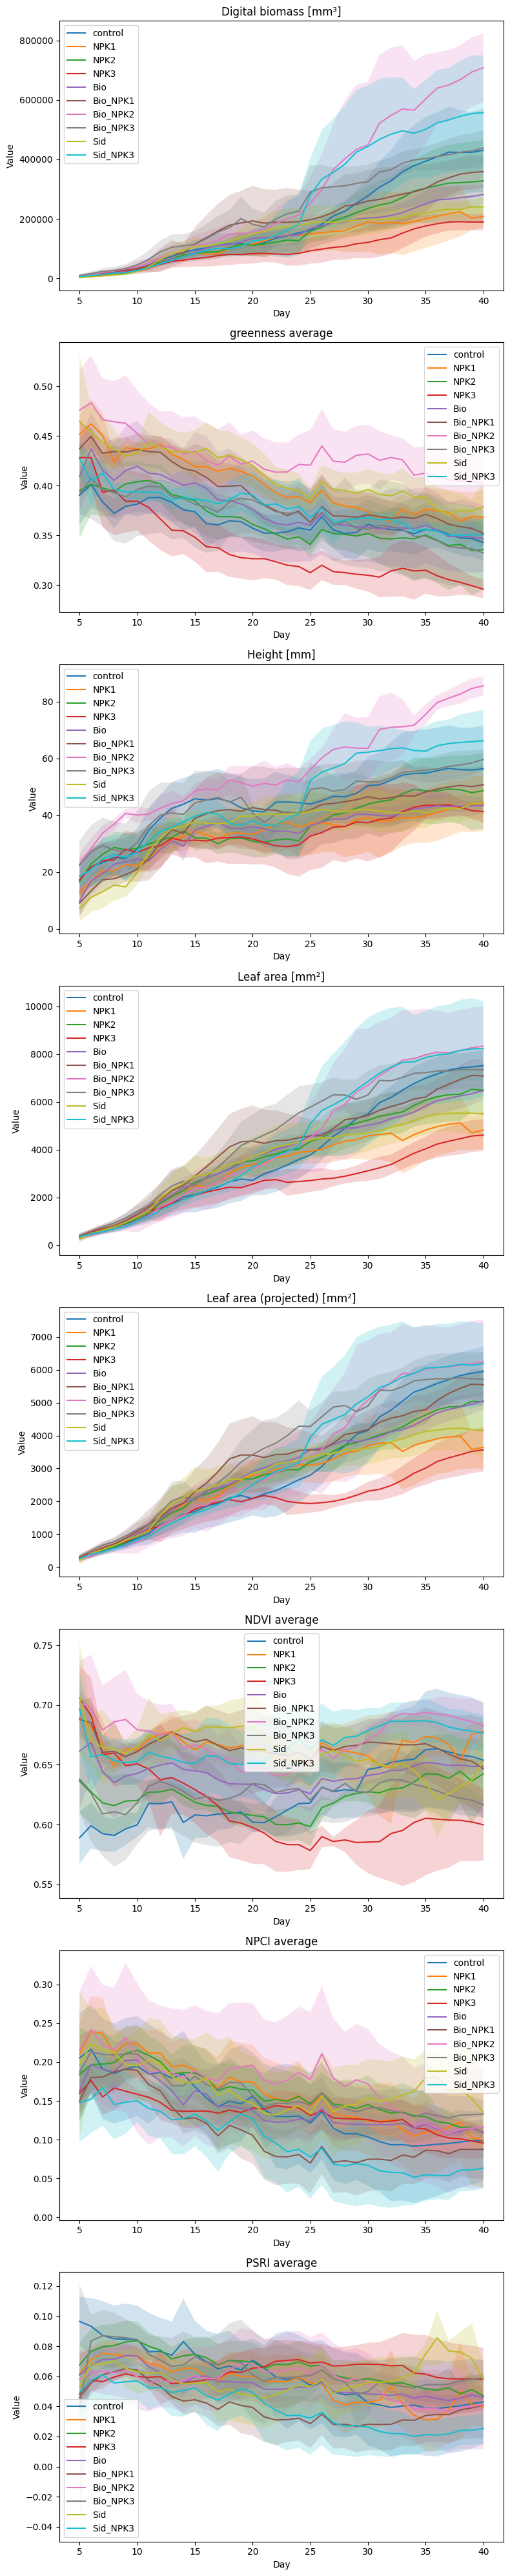

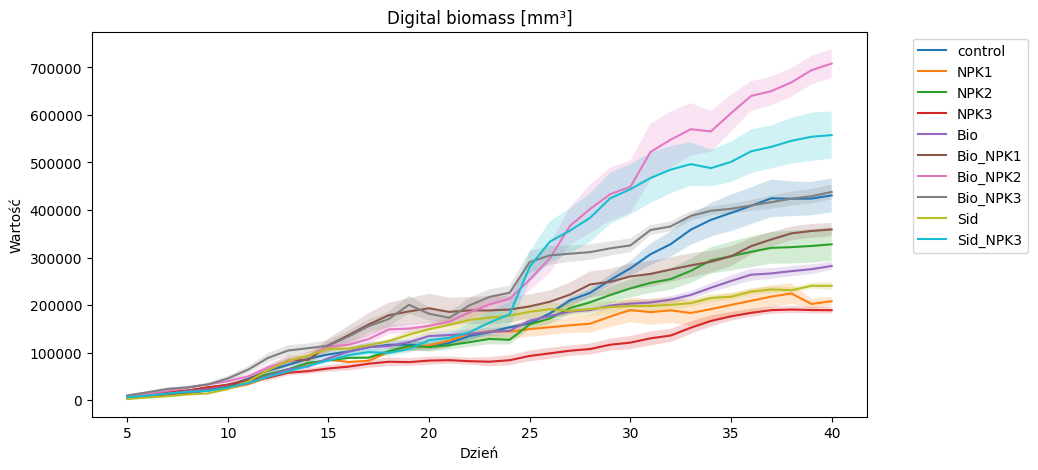

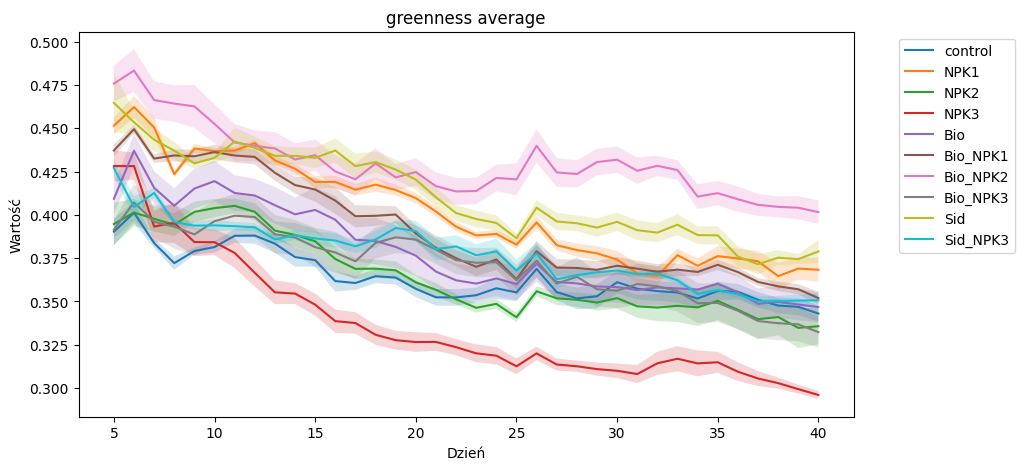

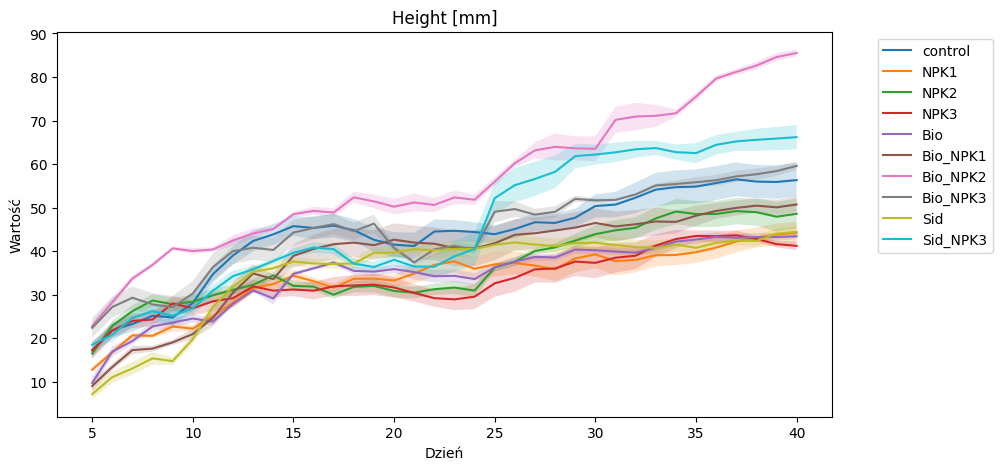

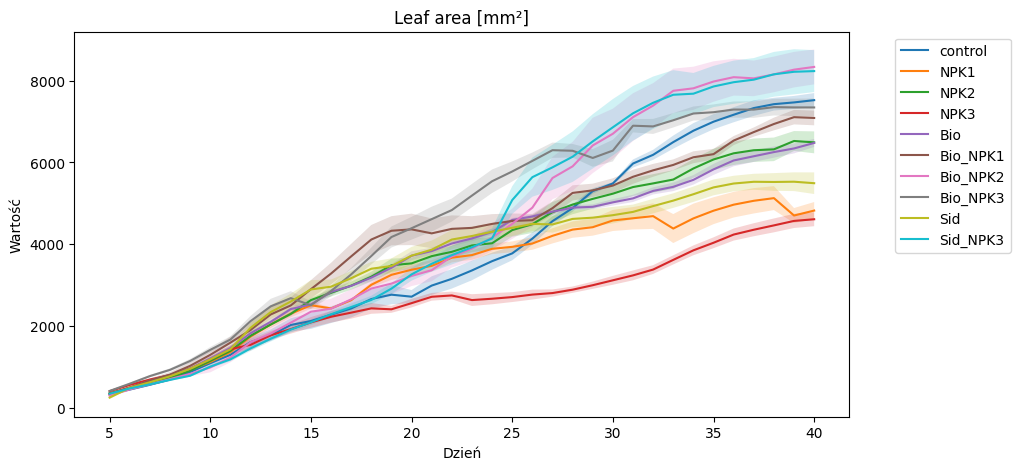

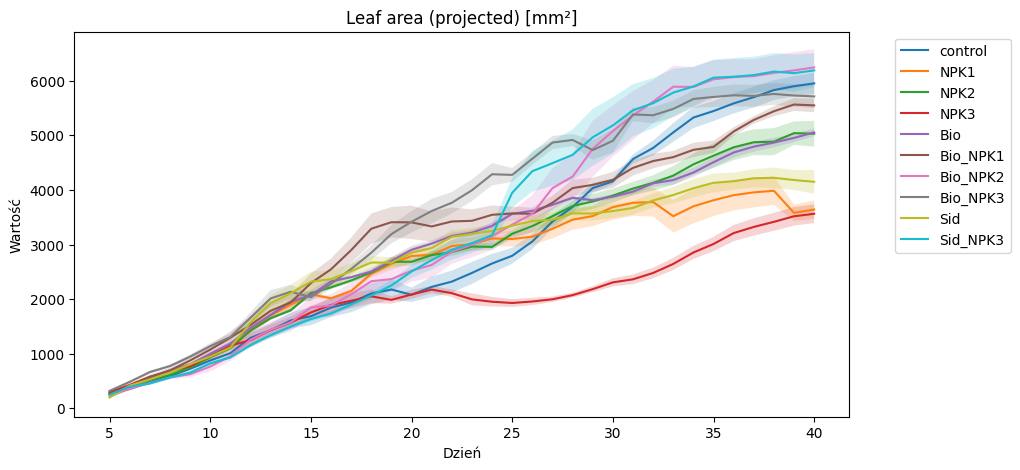

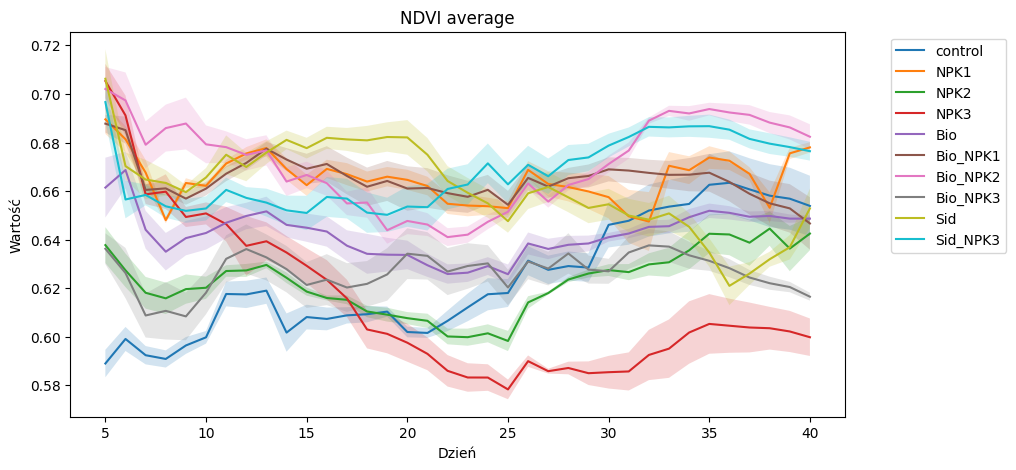

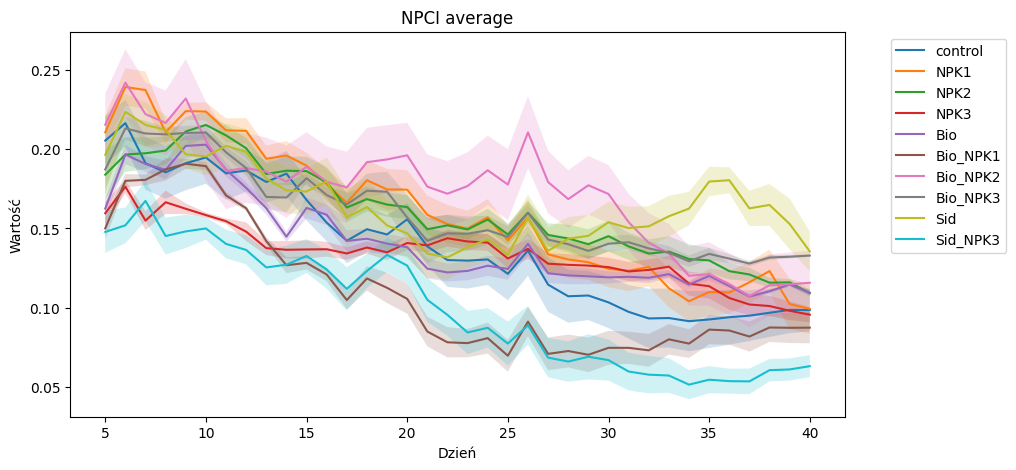

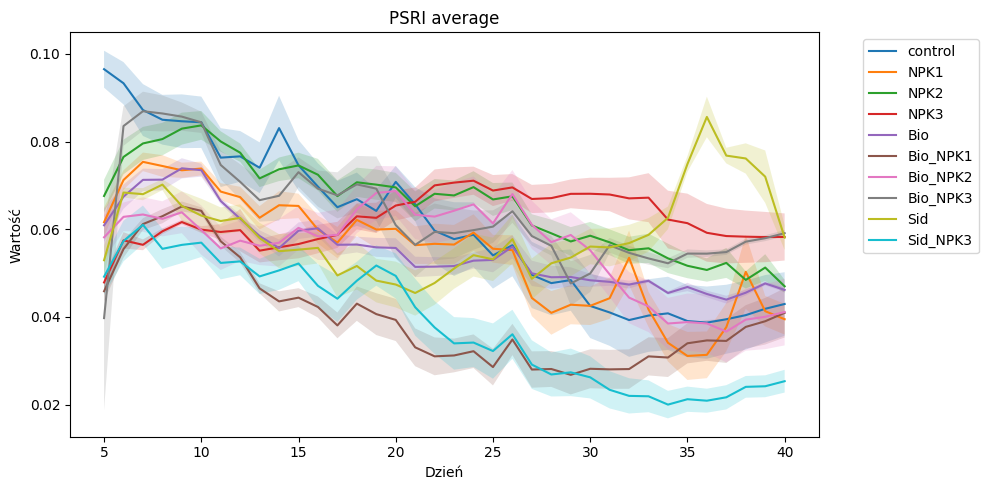

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

tab_cal1=pd.read_csv("Bio-Sid-NPK1_20231201_planteye.csv", sep=",")
tab_cal2=pd.read_csv("Bio_Sid_NPK6_20231201_planteye.csv", sep=",")

tab_cal=pd.concat([tab_cal1, tab_cal2])


days=[]
time=[]
for i in range(len(tab_cal)): 
    days.append(tab_cal.iloc[i,4].split(" ")[0])
    time.append(tab_cal.iloc[i,4].split(" ")[1])
dayslist=list(set(days))
dayslist.sort()

dayind=list(range(1, len(dayslist) + 1))
dind = dict(zip(dayslist, dayind))
dayscoded=[]
for i in range(len(days)):
    dayscoded.append(dind[days[i]])
tab_cal.insert(5,"Day",dayscoded)
tab_cal.insert(6,"Time", time)
rozkodowanie = {'1:10:1':'Bio_NPK1_6', '1:10:2':'NPK3_3', '1:10:3':'Sid_3', '1:1:1':'Bio_NPK1_4', '1:1:2':'Bio_6', '1:1:3':'Bio_NPK1_5', 
                '1:2:1':'Sid_NPK3_4', '1:2:2':'NPK1_5', '1:2:3':'Sid_2', '1:3:1':'Bio_NPK2_4','1:3:2':'con_2', '1:3:3':'NPK2_6', 
                '1:4:1':'Bio_NPK1_3', '1:4:2':'NPK3_4', '1:4:3':'Sid_NPK3_3', '1:5:1':'NPK1_1', '1:5:2':'con_4', '1:5:3':'NPK2_4', 
                '1:6:1':'Bio_NPK3_2', '1:6:2':'NPK2_2', '1:6:3':'Bio_NPK2_5','1:7:1':'Bio_NPK1_2', '1:7:2':'Bio_2', '1:7:3':'NPK1_6', 
                '1:8:1':'Sid_NPK3_6', '1:8:2':'Bio_NPK3_1', '1:8:3':'Bio_NPK2_6', '1:9:1':'Bio_3', '1:9:2':'Sid_NPK3_5', '1:9:3':'Bio_1', 
                '6:10:1':'con_6', '6:10:2':'Sid_6', '6:10:3':'Bio_NPK2_2', '6:1:1':'NPK1_4','6:1:2':'Sid_NPK3_2', '6:1:3':'NPK1_3', 
                '6:2:1':'Bio_NPK3_5', '6:2:2':'Bio_NPK2_1', '6:2:3':'NPK3_6', '6:3:1':'NPK3_5', '6:3:2':'NPK1_2', '6:3:3':'Bio_NPK3_3', 
                '6:4:1':'NPK2_1', '6:4:2':'con_1', '6:4:3':'NPK2_3', '6:5:1':'Sid_4', '6:5:2':'Bio_NPK3_6', '6:5:3':'Sid_5', '6:6:1':'Bio_4', 
                '6:6:2':'NPK3_2', '6:6:3':'Bio_5', '6:7:1':'Bio_NPK1_1', '6:7:2':'Sid_1', '6:7:3':'NPK2_5', '6:8:1':'Sid_NPK3_1', 
                '6:8:2':'con_5', '6:8:3':'NPK3_1', '6:9:1':'Bio_NPK2_3', '6:9:2':'Bio_NPK3_4', '6:9:3':'con_3'}

tab_cal.insert(0, 'kod', tab_cal['unit'].map(rozkodowanie))
Day20=tab_cal[tab_cal.Day == 20]

#df dla dnia 20 i wariantu NPK2, która posłuży do wykresu dla całego przebiegu greenness dla NPK2
NPK2Day20=tab_cal[(tab_cal.Day==20)&(tab_cal.treatment == "NPK2")] 
pNPK2d20=NPK2Day20[(NPK2Day20.unit=="1:3:3")] 


par=['unit', 'Day', 'Time', 'Digital biomass [mm³]']
pPar=tab_cal[par]
pPar = pPar[pPar['unit'] == "1:3:3"]

#wykres przebiegu greenness dla jednej rośliny, w ciągu całego eksperymentu, bez żadnego uśredninia

par2=['unit', 'Day', 'Time', 'greenness average']
pPar2=tab_cal[par2]
pPar2 = pPar2[pPar2['unit'] == "1:3:3"]



fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(25, 900)
ax.set_ylim(0, 0.5)
ax.set_xlabel('Dzień')
ax.set_ylabel('greenness average')

#dla drugiej rośliny
pPar3 = pPar2[pPar2['unit'] == "1:3:2"]



fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(25, 900)
ax.set_ylim(0, 0.5)
ax.set_xlabel('Dzień')
ax.set_ylabel('greenness average')

# wersja liniowa wykresu 
par2=['unit', 'Day', 'Time', 'greenness average']
pPar2=tab_cal[par2]
pPar2 = pPar2[pPar2['unit'] == "1:3:3"]


fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.plot(pPar2['Time'], 
           pPar2['greenness average'], 
           color= '#3503fc',
           marker= '^',
           markersize=1,
           linestyle='-',
           linewidth=1)
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(27, 900)


#jedna figura dla dwóch parametrów (greenness i db)

fig2 = plt.figure(figsize=plt.figaspect(0.01))
ax21 = fig2.add_subplot(211)
ax21.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax21.set_xticks(range(1, 894, 22))
ax21.set_xticklabels(range(1, 42, 1), rotation=45)
ax21.set_xlim(25, 900)

ax22 = fig2.add_subplot(212)
ax22.scatter(pPar['Time'], 
           pPar['Digital biomass [mm³]'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax22.set_xticks(range(1, 894, 22))
ax22.set_xticklabels(range(1, 42, 1), rotation=45)
ax22.set_xlim(25, 900)
 ## limity na osi y
fig2.subplots_adjust(hspace=1)
plt.show()

#lista warunków (czyli wariantów)
warunki=[]
for i in range(len(tab_cal)): 
    warunki.append(tab_cal.iloc[i,4])

warunkilista=list(set(warunki))

#cdzielenie całej tabeli na warianty nawożenia
tabele_warunki={}
for value in warunkilista:
    tabele_warunki[value]=Day20[Day20['treatment'] == value]

for value, df in tabele_warunki.items():
    print(f"Stosowane nawożenie: '{value}':")
    print(df.head())
    print('\n')


#tutaj robimy wybór jakie chcemy mieć kolumny w tych wszystkich naszych tabelach w słowniku
kol=['kod', 'unit', 'treatment', 'Day', 'Time', 'Digital biomass [mm³]', 'greenness average', 'Height [mm]', 'Leaf angle [°]', 
     'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 'NDVI average', 'NPCI average', 'PSRI average']

tab_war_kol = {key: df[kol] for key, df in tabele_warunki.items()}

for value, df in tab_war_kol.items():
    print(f"Stosowane nawożenie: '{value}':")
    print(df.head())
    print('\n')

control = tab_war_kol['control']
print(control.head())

unique_unit = control['unit'].unique()

col_unit = {}

for value in unique_unit:
    col_unit[value] = control[control['unit'] == value]


#wykres dla jednego dnia (20), tylko digital biomass, dla jakich 6 roślin wiec podjerzewam że jest to jeden wariant

fig44, axs44 = plt.subplots(1, len(col_unit), figsize=(4*len(col_unit), 3 ))

for i, (key, df) in enumerate(col_unit.items()):
    axs44[i].scatter(df['Time'], df['Digital biomass [mm³]'])
    axs44[i].set_title(f'{key}')
    axs44[i].set_xlabel('Time')
    axs44[i].set_ylabel('Digital Biomass [mm³]')
    axs44[i].set_xticks(range(0, len(df['Time']),2))
    axs44[i].set_xticklabels(df['Time'][::2],rotation = 80) 
    
    

plt.tight_layout()
plt.show()


# wszystkie wartości dla danego unitu dla danego wariantu,d la danego dnia (20)
war_unit_kol={}

for key, df in tab_war_kol.items():
    for value in df['kod'].unique():
        new_key = f"{value}"
        war_unit_kol[new_key] = df[df['kod'] == value]

for value, df in war_unit_kol.items():
    print(f"'{value}':")
    print(df.head())
    print('\n')

fig445, axs445 = plt.subplots(10, 6, figsize=(4*6, 3*10))

overall_min = float('inf')
overall_max = float('-inf')

for key, df in war_unit_kol.items():
    current_min = df['greenness average'].min()  # Find the minimum value in the current DataFrame
    current_max = df['greenness average'].max()  # Find the maximum value in the current DataFrame
    overall_min = min(overall_min, current_min)
    overall_max = max(overall_max, current_max)

for i, (key, df) in enumerate(war_unit_kol.items()):
    row = i // 6  # row index
    col = i % 6   # column index

    axs445[row, col].scatter(df['Time'], df['greenness average'], color='#3503fc')
    axs445[row, col].set_ylim(overall_min, overall_max)
    axs445[row, col].set_title(f'{key}')
    axs445[row, col].set_xlabel('Time')
    axs445[row, col].set_ylabel('greenness average')
    axs445[row, col].set_xticks(range(0, len(df['Time']),2))
    axs445[row, col].set_xticklabels(df['Time'][::2], rotation=80)
    axs445[row, col].axvspan(0, 4.5, color='green', alpha=0.2)
    

plt.tight_layout()
plt.show()


kol=['unit', 'treatment', 'Day', 'Digital biomass [mm³]', 'greenness average', 'Height [mm]', 
     'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 'NDVI average', 'NPCI average', 'PSRI average']

pA2= tab_cal[kol]

pA2 = pA2.loc[(pA2["Day"] > 4)& (pA2["Day"]<41)]

pA2.insert(loc=2, column="godz", value=pA2.groupby(['Day', 'unit']).cumcount()+1)
pA2 = pA2.loc[(pA2["godz"] < 6)]

## dla każdej rośliny oddzielnie ##

unitroślin=pA2['unit'].unique()
rozkodowanie = {'1:10:1':'Bio_NPK1_6', '1:10:2':'NPK3_3', '1:10:3':'Sid_3', '1:1:1':'Bio_NPK1_4', '1:1:2':'Bio_6', '1:1:3':'Bio_NPK1_5', 
                '1:2:1':'Sid_NPK3_4', '1:2:2':'NPK1_5', '1:2:3':'Sid_2', '1:3:1':'Bio_NPK2_4','1:3:2':'con_2', '1:3:3':'NPK2_6', 
                '1:4:1':'Bio_NPK1_3', '1:4:2':'NPK3_4', '1:4:3':'Sid_NPK3_3', '1:5:1':'NPK1_1', '1:5:2':'con_4', '1:5:3':'NPK2_4', 
                '1:6:1':'Bio_NPK3_2', '1:6:2':'NPK2_2', '1:6:3':'Bio_NPK2_5','1:7:1':'Bio_NPK1_2', '1:7:2':'Bio_2', '1:7:3':'NPK1_6', 
                '1:8:1':'Sid_NPK3_6', '1:8:2':'Bio_NPK3_1', '1:8:3':'Bio_NPK2_6', '1:9:1':'Bio_3', '1:9:2':'Sid_NPK3_5', '1:9:3':'Bio_1', 
                '6:10:1':'con_6', '6:10:2':'Sid_6', '6:10:3':'Bio_NPK2_2', '6:1:1':'NPK1_4','6:1:2':'Sid_NPK3_2', '6:1:3':'NPK1_3', 
                '6:2:1':'Bio_NPK3_5', '6:2:2':'Bio_NPK2_1', '6:2:3':'NPK3_6', '6:3:1':'NPK3_5', '6:3:2':'NPK1_2', '6:3:3':'Bio_NPK3_3', 
                '6:4:1':'NPK2_1', '6:4:2':'con_1', '6:4:3':'NPK2_3', '6:5:1':'Sid_4', '6:5:2':'Bio_NPK3_6', '6:5:3':'Sid_5', '6:6:1':'Bio_4', 
                '6:6:2':'NPK3_2', '6:6:3':'Bio_5', '6:7:1':'Bio_NPK1_1', '6:7:2':'Sid_1', '6:7:3':'NPK2_5', '6:8:1':'Sid_NPK3_1', 
                '6:8:2':'con_5', '6:8:3':'NPK3_1', '6:9:1':'Bio_NPK2_3', '6:9:2':'Bio_NPK3_4', '6:9:3':'con_3'}


pA2.insert(0, 'kod', pA2['unit'].map(rozkodowanie))

roś = ['con_4','con_1','con_3','Bio_6','Bio_3','Bio_1','NPK1_2','NPK1_4','NPK1_5','NPK2_6','NPK2_1','NPK2_3','NPK3_5','NPK3_2',
          'NPK3_6','Bio_NPK1_6','Bio_NPK1_5','Bio_NPK1_4','Bio_NPK2_1','Bio_NPK2_5','Bio_NPK2_4','Bio_NPK3_2','Bio_NPK3_3','Bio_NPK3_6',
          'Sid_NPK3_2','Sid_NPK3_4','Sid_NPK3_3','Sid_3','Sid_6','Sid_1']


treatment=['control', 'NPK1', 'NPK2', 'NPK3', 'Bio', 'Bio_NPK1', 'Bio_NPK2','Bio_NPK3', 'Sid', 'Sid_NPK3']
pA2treat_dict={}
for i in treatment:
    pA2treat_dict[i] = pA2[pA2['treatment'] == i]

for i, df in pA2treat_dict.items():
    pA2treat_dict[i]=df.drop(df[df['kod'].isin(roś)].index, inplace=False)

##wykres dla każdej z roślin oddzielnie 

pA2treat=pA2.loc[(pA2["treatment"] == 'Bio_NPK2')]
color_palette = ['#3503fc', '#2ca02c', '#17becf', '#ff69b4', '#008080', '#9467bd']
unikalna_roślina = pA2treat['kod'].unique()
pA2treat_unit_dict={}
for i in unikalna_roślina:
    pA2treat_unit_dict[i]=pA2treat[pA2treat['kod']==i]

unit_średnie_sd={}

for i, df in pA2treat_unit_dict.items():
    mean = df.iloc[:, 4:].groupby("Day", as_index=False).mean()
    std_dev = df.iloc[:, 4:].groupby("Day", as_index=False).sem()
    
    średnie_sd = mean.merge(std_dev, on="Day", suffixes=('', 'std'))
    
    unit_średnie_sd[i] = średnie_sd

import matplotlib.pyplot as plt
kolumny2 = set()
for df in unit_średnie_sd.values():
    kolumny2.update(df.columns[1:8])

for kolumna in kolumny2:
    fig9, ax9 = plt.subplots(figsize=(10, 5))
    color_index = 0
    for variant, df in unit_średnie_sd.items():
        ax9.plot(df['Day'], df[kolumna], label=variant, color = color_palette[color_index % len(color_palette)])
        
        upper_bound = df[kolumna] + df[f"{kolumna}std"]
        lower_bound = df[kolumna] - df[f"{kolumna}std"]
        
        ax9.fill_between(df['Day'], lower_bound, upper_bound,color=color_palette[color_index % len(color_palette)],  alpha=0.2)
        color_index += 1
    ax9.set_title(kolumna)
    ax9.set_xlabel('Dzień')
    ax9.set_ylabel('Wartość')
    ax9.legend()
    
    plt.show()

# mamy dodawać wariant nawożenia i potem dodajemy, co chcemy usunąć, a potem możemy sobie wygenerować wykresy, które są porównaniem średniej
# bez odrzucenia i po odrzuceniu 

pA2treat=pA2.loc[(pA2["treatment"] == 'Bio_NPK2')] ## tutaj wpisuje się jaki chcemy wariant nawożenia
mean1 = pA2treat.iloc[:, 4:].groupby("Day", as_index=False).mean()
std_dev1 = pA2treat.iloc[:, 4:].groupby("Day", as_index=False).std()
    
średnie_sd1 = mean1.merge(std_dev1, on="Day", suffixes=('_', '_std'))

##rośliny do usunięcia
rośdel = ['Bio:6','Bio:3','Bio:1', 'Bio_NPK2:1','Bio_NPK2:5','Bio_NPK2:4',]

pA3=pA2treat.drop(pA2treat[pA2treat['kod'].isin(roś)].index, inplace = False)

mean2 = pA3.iloc[:, 4:].groupby("Day", as_index=False).mean()
std_dev2 = pA3.iloc[:, 4:].groupby("Day", as_index=False).std()
    
średnie_sd2 = mean2.merge(std_dev2, on="Day", suffixes=('_', '_std'))


kolumny3 = set()
kolumny3.update(średnie_sd1.columns[1:8])

num_plots = len(kolumny3)

#koniec wykresów porównawczych 

fig, axs = plt.subplots(num_plots, 2, figsize=(15, 5*num_plots))
for i, kolumna in enumerate(kolumny3):
    ax1 = axs[i, 0] 
    ax2 = axs[i, 1] 
    
    
    ax1.plot(średnie_sd1['Day'], średnie_sd1[kolumna])
    upper_bound = średnie_sd1[kolumna] + średnie_sd1[f"{kolumna}std"]
    lower_bound = średnie_sd1[kolumna] - średnie_sd1[f"{kolumna}std"]
    ax1.fill_between(średnie_sd1['Day'], lower_bound, upper_bound, alpha=0.2)
    ax1.set_title(kolumna)
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Value')
    ax1.legend(pA2treat['treatment'])

    ax2.plot(średnie_sd2['Day'], średnie_sd2[kolumna])
    upper_bound = średnie_sd2[kolumna] + średnie_sd2[f"{kolumna}std"]
    lower_bound = średnie_sd2[kolumna] - średnie_sd2[f"{kolumna}std"]
    ax2.fill_between(średnie_sd2['Day'], lower_bound, upper_bound, alpha=0.2)
    ax2.set_title(kolumna)
    ax2.set_xlabel('Day')
    ax2.set_ylabel('Value')
    ax2.legend(pA2treat['treatment'])
    ax2.set_ylim(ax1.get_ylim())

plt.tight_layout()
plt.show()

##wykres dla samych średnich

średnie={}

for i, df in pA2treat_dict.items():
    mean = df.iloc[:, 4:].groupby("Day", as_index=False).mean()
    średnie[i] = mean

kolumny = ['Digital biomass [mm³]', 'greenness average', 'Height [mm]', 'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 
            'NDVI average', 'NPCI average', 'PSRI average']

ilość_wykresów = len(kolumny)

fig, axs = plt.subplots(ilość_wykresów, 1, figsize=(8, 5*ilość_wykresów))

for i, kolumna in enumerate(kolumny):
    for treatment, średnia in średnie.items():
        axs[i].plot(średnia['Day'], średnia[kolumna], label=treatment)
        axs[i].set_title(kolumna)
        axs[i].set_xlabel('Day')
        axs[i].set_ylabel('Value')
        axs[i].legend()

plt.tight_layout()

plt.show()

#wykres dla średnich z sd

średnie_sd={}

for i, df in pA2treat_dict.items():
    mean = df.iloc[:, 4:].groupby("Day", as_index=False).mean()
    std_dev = df.iloc[:, 4:].groupby("Day", as_index=False).std()
    
    średnia_sd = mean.merge(std_dev, on="Day", suffixes=('', 'std'))
    
    średnie_sd[i] = średnia_sd

kolumny2 = ['Digital biomass [mm³]', 'greenness average', 'Height [mm]', 'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 
            'NDVI average', 'NPCI average', 'PSRI average']


fig, axs = plt.subplots(ilość_wykresów, 1, figsize=(8, 5*ilość_wykresów))

for i, kolumna in enumerate(kolumny2):
    for variant, df in średnie_sd.items():
        ax1 = axs[i]
        ax1.plot(df['Day'], df[kolumna], label=variant)
        
        upper_bound = df[kolumna] + df[f"{kolumna}std"]
        lower_bound = df[kolumna] - df[f"{kolumna}std"]
        
        ax1.fill_between(df['Day'], lower_bound, upper_bound, alpha=0.2)
        ax1.set_title(kolumna)
        ax1.set_xlabel('Day')
        ax1.set_ylabel('Value')
        ax1.legend()

plt.tight_layout()

plt.show()


średnie_se={}

for i, df in pA2treat_dict.items():
    mean = df.iloc[:, 4:].groupby("Day", as_index=False).mean()
    se = df.iloc[:, 4:].groupby("Day", as_index=False).sem()
    
    średnia_se = mean.merge(se, on="Day", suffixes=('', 'se'))
    
    średnie_se[i] = średnia_se



for i, kolumna in enumerate(kolumny2):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    for variant, df in średnie_se.items():
        
        ax1.plot(df['Day'], df[kolumna], label=variant)
        
        upper_bound = df[kolumna] + df[f"{kolumna}se"]
        lower_bound = df[kolumna] - df[f"{kolumna}se"]
        
        ax1.fill_between(df['Day'], lower_bound, upper_bound, alpha=0.2)
    
    ax1.set_title(kolumna)
    ax1.set_xlabel('Dzień')
    ax1.set_ylabel('Wartość')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()



